# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Imports](#3.2_Imports)
  * [3.3 Load The Data](#3.3_Load_The_Data)
  * [3.4 Explore The Data](#3.4_Explore_The_Data)
      * [3.4.1 Total Tracks Per Category](#3.4.1_Total_tracks_per_category) 
          * [3.4.1.1 Total Tracks Per Genre](#3.4.1.1_Total_tracks_per_genre)
          * [3.4.1.2 Total Tracks Per Decade](#3.4.1.2_Total_tracks_per_decade)
          * [3.4.1.3 Total Tracks Per Artist](#3.4.1.3_Total_tracks_per_artist)
      * [3.4.2 Total Tracks Per Genre and Decade](#3.4.2_Total_tracks_per_genre_and_decade) 
      * [3.4.3 Visualizing High Dimensional Data](#3.4.3_Visualizing_High_Dimensional_Data) 
          * [3.4.3.1 Scale the data](#3.4.3.1_Scale_the_data)
               * [3.4.3.1.1 Verifying the scaling](#3.4.3.1.1_Verifying_the_scaling)
          * [3.4.3.2 Calculate the PCA transformation](#3.4.3.2_Calculate_the_PCA_transformation)
          * [3.4.3.3 Average Dancibility by Genre](#3.4.3.3_Average_danceability_by_genre)
          * [3.5.3.4 Adding average xxx to scatter plot](#3.5.3.4_Adding_average_xxx_to_scatter_plot)
      * [3.4.4 Question 4 TBD](#3.4.4_TBD)
      * [3.4.5 Question 5 TBD](#3.4.5_TBD)
      * [3.4.6 Question 6 TBD](#3.4.6_TBD)
      * [3.4.7 Spotify Non-Categorigal Data](#3.4.7_Spotify_Non-Categorical_Data)
        * [3.4.7.1 Feature Engineering](#3.4.7_Feature_Engineering)
        * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
        * [3.5.5.3 Scatterplots of numeric features against ?](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.5 Summary](#3.5_Summary)


## 3.2 Imports<a id='3.2_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 3.3 Load The Data<a id='3.3_Load_The_Data'></a>

In [2]:
spotify_data = pd.read_csv('../data/genre_music.csv')
spotify_data.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b


## 3.4 Explore The Data<a id='3.4_Explore_The_Data'></a>

### 3.4.1 Total Tracks Per Category<a id='3.4.1_Total_tracks_per_category'></a>

   #### 3.4.1.1 Total Tracks Per Genre <a id='3.4.1.1_Total_tracks_per_genre'></a>

In [3]:
spotify_data_newind = spotify_data.set_index('track')

In [4]:
spotify_data_newind['genre'].value_counts()

pop      16460
r&b      11040
rock      6850
latin     2870
rap       2364
edm       1515
Name: genre, dtype: int64

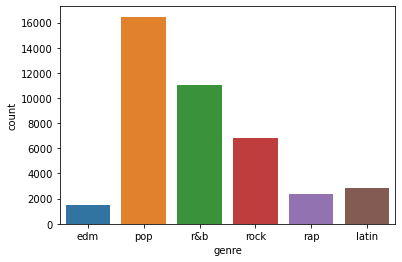

In [5]:
ax = sns.countplot(x="genre", data=spotify_data_newind)

The genre with the most tracks included is pop by a significant margin followed by R&B and rock.  It would be interesting to see how these genres are split over time as definitions of genres or popularity of genres change over time.

   #### 3.4.1.2 Total Tracks Per Decade<a id='3.4.1.2_Total_tracks_per_decade'></a>

In [13]:
spotify_data_newind['decade'].value_counts()

60s    8642
70s    7764
80s    6907
10s    6396
00s    5871
90s    5519
Name: decade, dtype: int64

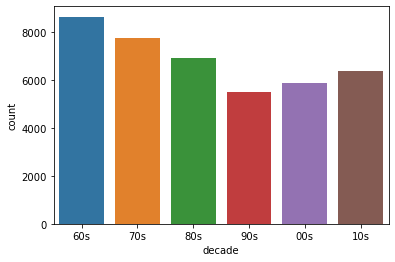

In [12]:
bx = sns.countplot(x="decade", data=spotify_data_newind)

The population overall is more heavily weighted to earlier time periods (60's and 70's) with the smallest population being the 90's.  While the decade populations increase in 00's and 10's, the increase isn't as dramatic as the prior variances.

   #### 3.4.1.3 Total Tracks Per Artist<a id='3.4.1.3_Total_tracks_per_artist'></a>

In [21]:
spotify_data_newind['artist'].value_counts()

Traditional                 207
Harry Belafonte             140
P. Susheela                 130
Ennio Morricone             128
Jerry Goldsmith             124
                           ... 
Axe                           1
Joy Of Cooking                1
ItaloBrothers                 1
Curiosity Killed The Cat      1
A Bolha                       1
Name: artist, Length: 11902, dtype: int64

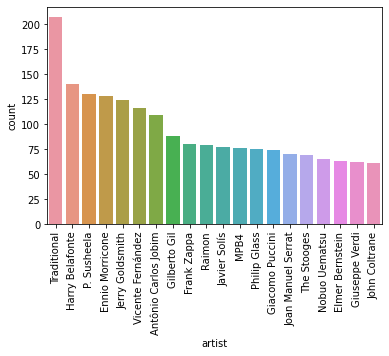

In [34]:
cx = sns.countplot(x="artist", data=spotify_data_newind, order=spotify_data_newind.artist.value_counts().iloc[:20].index)

plt.xticks(rotation=90)

plt.show()


In [26]:
spotify_data_newind['artist'].value_counts().iloc[:100]

Traditional        207
Harry Belafonte    140
P. Susheela        130
Ennio Morricone    128
Jerry Goldsmith    124
                  ... 
Rascal Flatts       33
Bobby Vinton        33
Leno e Lilian       33
John Denver         32
Running Wild        32
Name: artist, Length: 100, dtype: int64

In [32]:
spotify_data_newind['artist'].value_counts().iloc[:500]

Traditional        207
Harry Belafonte    140
P. Susheela        130
Ennio Morricone    128
Jerry Goldsmith    124
                  ... 
Sting               15
Tina Turner         15
Jason Derulo        15
J. Cole             15
Cliff Richard       15
Name: artist, Length: 500, dtype: int64

While there are multiple tracks assigned to a single artist, there remains huge variation in the artist names as well as some creative spellings for these names.  As such, it is impractical to graph the full artist split.  The above graph shows only the top 20 artists to see which artist are the most represented in the sample.  

We've added a look at the top 100 and top 500 to see some samples of how the frequencies change throughout the sample.

****Is there a better way to track this???

  ### 3.4.2 Total Tracks Per Genre and Decade<a id='3.4.2_Total_tracks_per_genre_and_decade'></a>

In [6]:
frequency = spotify_data_newind.groupby(["genre", "decade"]).size()
print (frequency)

genre  decade
edm    00s        245
       10s        276
       60s        256
       70s        254
       80s        239
       90s        245
latin  00s        734
       10s        705
       60s        227
       70s        332
       80s        488
       90s        384
pop    00s       1372
       10s       2333
       60s       5425
       70s       3712
       80s       2174
       90s       1444
r&b    00s       1921
       10s       1403
       60s        598
       70s       1946
       80s       2910
       90s       2262
rap    00s        585
       10s        733
       60s        275
       70s        242
       80s        163
       90s        366
rock   00s       1014
       10s        946
       60s       1861
       70s       1278
       80s        933
       90s        818
dtype: int64


We'll graph the data in two different ways so that we can see how trends change over time within the sample and within the genre itself.

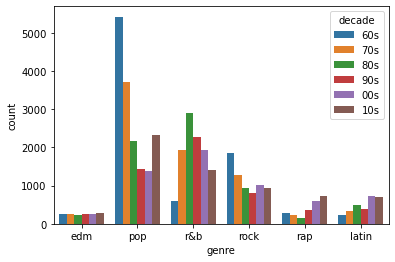

In [7]:
bx = sns.countplot(x="genre", hue="decade", data=spotify_data_newind)

The genre with the most tracks included is pop with more tracks in the 60's and 70's with a significant population in all decades.  EDM, rap & latin genres have a relatively small population in comparison.  R&B shows a clear pattern in increasing then decreasing population with the most tracks in the 1980's.  The opposite pattern is seen in the rock genre with 

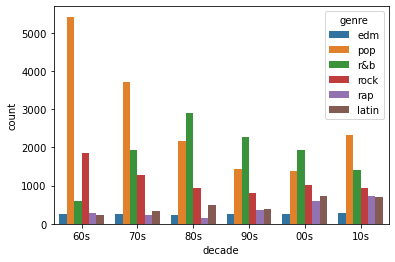

In [8]:
cx = sns.countplot(x="decade", hue="genre", data=spotify_data_newind)

Over time, a few genres show to shift their importance over time.  The two most obvious being pop and R&B.  In the 60's the count 

### 3.4.3 Visualizing High Dimensional Data<a id='3.4.3_Visualizing_High_Dimensional_Data'></a>

We've identified some potentially useful and business relevant features, derived from summary statistics. We've explored these features in turn and found various trends. Some genres have more tracks than others.  Some time periods may have more genre variation than others. Some features will also be more correlated with one another than others.

Principle Component Analysis (PCA) will allow us to disentangle this interconnected web of relationships.  This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. We can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. We can also explore how the original features contribute to these derived features.

***remember to remove this cell from notebook

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.4.3.1 Scale the data<a id='3.4.3.1_Scale_the_data'></a>

Genres will be set as the index so that we can keep the categories associated to the numeric data here.

In [35]:
spotify_scale = spotify_data.set_index('genre')

spotify_index = spotify_scale.index
spotify_columns = spotify_scale.columns
spotify_scale.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade
genre,,,,,,,,,,,,,,,,,,,
edm,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s
pop,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s
pop,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s
pop,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s
r&b,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s


The above does not what we want: the genre has been moved to the index but the columns we want are all numeric and we still have the categorical columns inclueded in the file.

In [36]:
del spotify_scale['track']
del spotify_scale['artist']
del spotify_scale['decade']

In [37]:
spotify_index = spotify_scale.index
spotify_columns = spotify_scale.columns
spotify_scale.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity
genre,,,,,,,,,,,,,,,,
edm,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1
pop,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0
pop,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0
pop,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0
r&b,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0


In [38]:
spotify_scale = scale(spotify_scale)

Note, `scale()` returns an ndarray, so you lose the column names. Because you want to visualise scaled data, you already copied the column names. Now you can construct a dataframe from the ndarray here and reintroduce the column names.

In [39]:
#Create a new dataframe from `spotify_scale` using the column names we saved in `spotify_columns`
spotify_scaled_df = pd.DataFrame(spotify_scale, columns=spotify_columns)
spotify_scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity
0,-0.689981,0.160142,-0.626235,0.469661,0.664998,-0.379213,0.371103,-0.508718,-0.714836,1.131746,2.279088,-0.515621,-2.112306,-0.376564,-0.302882,1.000073
1,-0.234429,-0.295077,-0.626235,-0.424305,0.664998,-0.455863,-1.021622,-0.156181,-0.147635,0.952193,-0.602615,-0.178724,0.251386,0.458697,-0.097626,-0.999927
2,0.659804,0.274936,-0.060467,-0.596960,0.664998,-0.405925,1.421549,-0.508703,-0.477201,1.367410,-0.116718,-0.091752,0.251386,-0.151541,0.312886,-0.999927
3,0.282989,-0.136740,0.505301,-0.345791,-1.503765,0.360579,1.008452,-0.427667,-0.812549,1.588111,-0.472335,-0.646968,0.251386,-0.807728,-0.508138,-0.999927
4,-0.138819,0.734114,1.636838,1.262708,-1.503765,0.592853,1.454007,-0.505845,0.066294,1.359929,-0.162184,0.090146,0.251386,-0.963259,0.723397,-0.999927


##### 3.4.3.1.1 Verifying the scaling<a id='3.4.3.1.1_Verifying_the_scaling'></a>

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [44]:
spotify_scaled_df.mean()

danceability        2.812093e-16
energy              4.186696e-15
key                -1.535857e-15
loudness           -3.350524e-16
mode                9.809942e-15
speechiness        -7.659712e-16
acousticness       -7.570176e-16
instrumentalness   -1.036471e-15
liveness            9.048943e-17
valence            -1.653435e-16
tempo              -3.040897e-16
duration_s          1.854091e-16
time_signature     -2.408214e-14
chorus_hit         -8.968443e-19
sections            4.856736e-17
popularity         -2.031514e-16
dtype: float64

***Is this the right mean??

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [42]:
spotify_scaled_df.std(ddof=0 )

danceability        1.0
energy              1.0
key                 1.0
loudness            1.0
mode                1.0
speechiness         1.0
acousticness        1.0
instrumentalness    1.0
liveness            1.0
valence             1.0
tempo               1.0
duration_s          1.0
time_signature      1.0
chorus_hit          1.0
sections            1.0
popularity          1.0
dtype: float64

#### 3.4.3.2 Calculate the PCA transformation<a id='3.4.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [45]:
spotify_pca = PCA().fit(spotify_scale)

Plot the cumulative variance ratio with number of components.

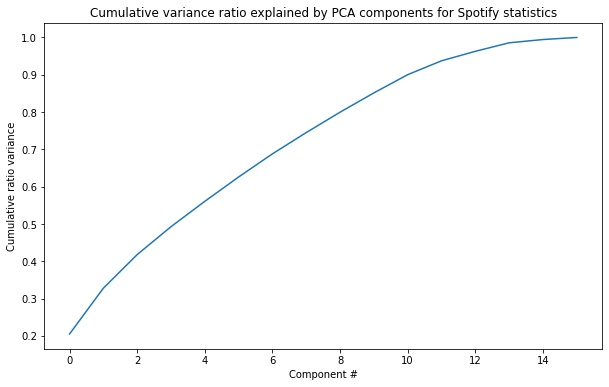

In [47]:
plt.subplots(figsize=(10, 6))
plt.plot(spotify_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Spotify statistics');

The components seem to nearly equally account for the variance in the genre.  The first component seems to be a bit more correlated than the rest.  The last two components appear to be less relevant to the analysis.

Apply the transformation to the data to obtain the derived features.

In [48]:
spotify_pca_x = spotify_pca.transform(spotify_scale)

In [49]:
spotify_pca_x.shape

(41099, 16)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

Compare the first components with the other components and see how they compare to each other.

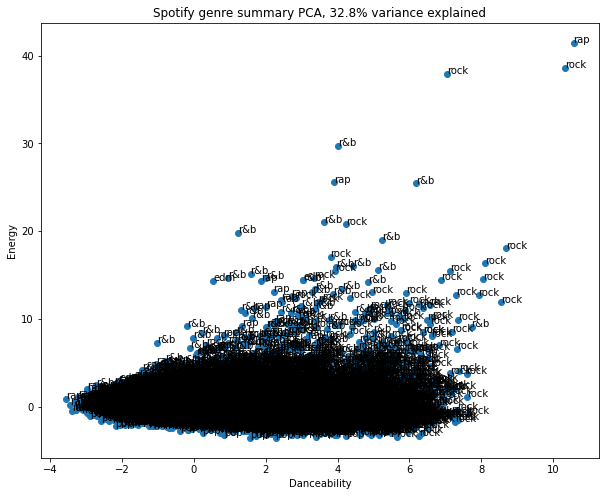

In [52]:
x = spotify_pca_x[:, 0]
y = spotify_pca_x[:, 1]
genre = spotify_index
pc_var = 100 * spotify_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title(f'Spotify genre summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(genre, x, y):
    plt.annotate(s, (x, y))

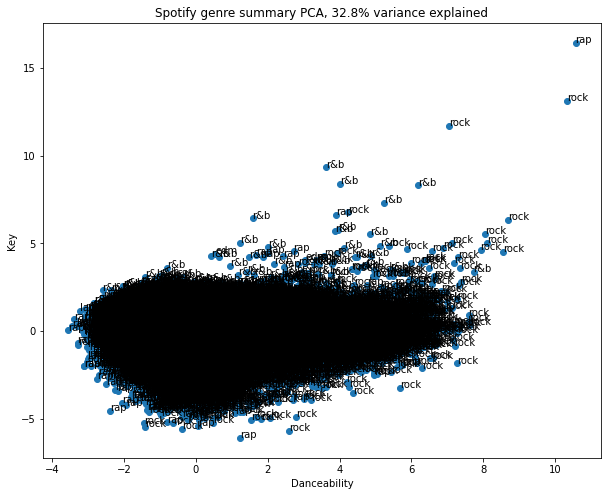

In [54]:
x = spotify_pca_x[:, 0]
y = spotify_pca_x[:, 2]
genre = spotify_index
pc_var = 100 * spotify_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('Danceability')
plt.ylabel('Key')
plt.title(f'Spotify genre summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(genre, x, y):
    plt.annotate(s, (x, y))

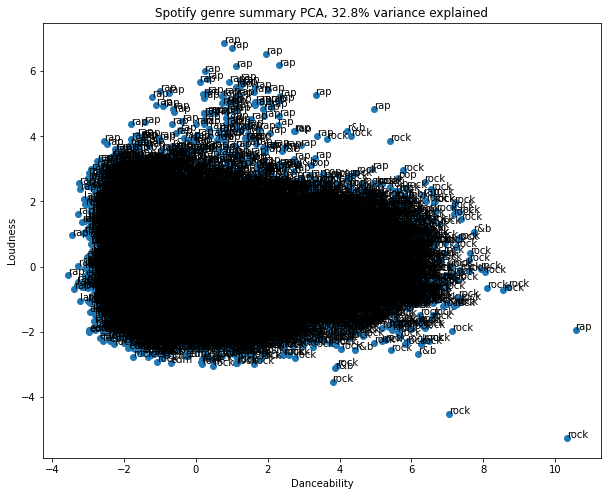

In [55]:
x = spotify_pca_x[:, 0]
y = spotify_pca_x[:, 3]
genre = spotify_index
pc_var = 100 * spotify_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('Danceability')
plt.ylabel('Loudness')
plt.title(f'Spotify genre summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(genre, x, y):
    plt.annotate(s, (x, y))

#### 3.4.3.3 Average Dancibility by Genre<a id='3.4.3.3_Average_danceability_by_genre'></a>

In [59]:
avg_dancibility = spotify_data.groupby('genre')['danceability'].mean()
avg_dancibility.head(10)

genre
edm      0.494884
latin    0.572840
pop      0.595708
r&b      0.604391
rap      0.650625
rock     0.258498
Name: danceability, dtype: float64

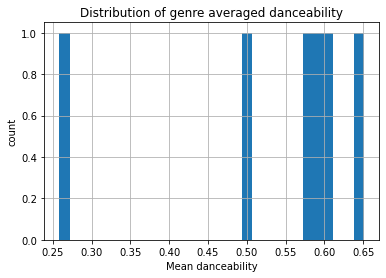

In [60]:
avg_dancibility.hist(bins=30)
plt.title('Distribution of genre averaged danceability')
plt.xlabel('Mean danceability')
plt.ylabel('count');

In [61]:
avg_energy = spotify_data.groupby('genre')['energy'].mean()
avg_energy.head(10)

genre
edm      0.623390
latin    0.914565
pop      0.525077
r&b      0.618209
rap      0.639897
rock     0.477217
Name: energy, dtype: float64

In [62]:
avg_loudness = spotify_data.groupby('genre')['loudness'].mean()
avg_loudness.head(10)

genre
edm      -9.096207
latin    -5.450051
pop     -10.444989
r&b      -9.748605
rap      -8.925788
rock    -13.141479
Name: loudness, dtype: float64

In [64]:
avg_speechiness = spotify_data.groupby('genre')['speechiness'].mean()
avg_speechiness.head(10)

genre
edm      0.072475
latin    0.070059
pop      0.051503
r&b      0.055777
rap      0.353405
rock     0.056705
Name: speechiness, dtype: float64

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

At this point you have several objects floating around. You have just calculated average ticket price by state from our ski resort data, but you've been looking at principle components generated from other state summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [ ]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index= state_summary_index)
pca_df.head()

That worked, and you have state as an index.

In [ ]:
# our average state prices also have state as an index
state_avg_price.head()

In [ ]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

Now you can concatenate both parts on axis 1 and using the indexes.

In [ ]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

You saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. You'll add another column where you seperate these prices into quartiles; that might show something.

In [ ]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

In [ ]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just print out any rows that have any null values, expecting an empty DataFrame.

In [ ]:
pca_df[pca_df.isnull().any(axis=1)]

Ah, Rhode Island. How has this happened? Recall you created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because you wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [ ]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

Note, in the above Quartile has the string value 'NA' that you inserted. This is different to `numpy`'s NaN type.

You now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

In [ ]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Now, you see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, you simply do not seeing a pattern with price.

The above scatterplot was created using matplotlib. This is powerful, but took quite a bit of effort to set up. You have to iterate over the categories, plotting each separately, to get a colour legend. You can also tell that the points in the legend have different sizes as well as colours. As it happens, the size and the colour will be a 1:1 mapping here, so it happily works for us here. If we were using size and colour to display fundamentally different aesthetics, you'd have a lot more work to do. So matplotlib is powerful, but not ideally suited to when we want to visually explore multiple features as here (and intelligent use of colour, point size, and even shape can be incredibly useful for EDA).

Fortunately, there's another option: seaborn. You saw seaborn in action in the previous notebook, when you wanted to distinguish between weekend and weekday ticket prices in the boxplot. After melting the dataframe to have ticket price as a single column with the ticket type represented in a new column, you asked seaborn to create separate boxes for each type.

In [ ]:
#Code task 11#
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x='PC1', y='PC2', size='AdultWeekend', hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

Seaborn does more! You should always care about your output. What if you want the ordering of the colours in the legend to align intuitively with the ordering of the quartiles? Add a `hue_order` argument! Seaborn has thrown in a few nice other things:

* the aesthetics are separated in the legend
* it defaults to marker sizes that provide more contrast (smaller to larger)
* when starting with a DataFrame, you have less work to do to visualize patterns in the data

The last point is important. Less work means less chance of mixing up objects and jumping to erroneous conclusions. This also emphasizes the importance of getting data into a suitable DataFrame. In the previous notebook, you `melt`ed the data to make it longer, but with fewer columns, in order to get a single column of price with a new column representing a categorical feature you'd want to use. A **key skill** is being able to wrangle data into a form most suited to the particular use case.

Having gained a good visualization of the state summary data, you can discuss and follow up on your findings.

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension. But if you were curious, could you get an idea what it is that pushes Vermont and New Hampshire up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of `components_` with the feature names for context:

In [ ]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

For the row associated with the second component, are there any large values?

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [ ]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

In [ ]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

You can offer some justification for treating all states equally, and work towards building a pricing model that considers all states together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have captured potentially relevant state data in features most likely to be relevant to your business use case. This answers a big question!

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

After what may feel a detour, return to examining the ski resort data. It's worth noting, the previous EDA was valuable because it's given us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in your modeling.

In [ ]:
ski_data.head().T

#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously spent some time exploring the state summary data you derived, you now start to explore the resort-level data in more detail. This can help guide you on how (or whether) to use the state labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, you can engineer a resort's share of the supply for a given state.

In [66]:
spotify_data.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b


#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

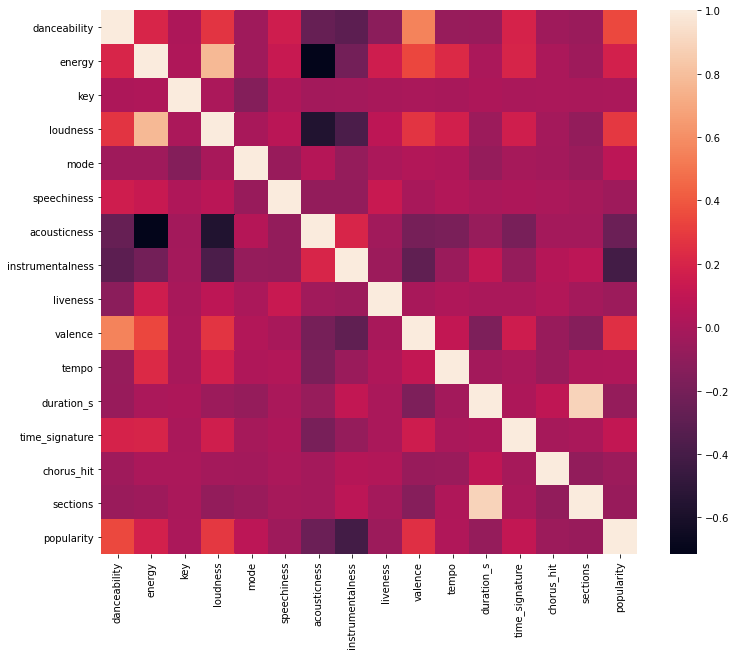

In [67]:
plt.subplots(figsize=(12,10))
sns.heatmap(spotify_data.corr());

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [68]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'genre', data=spotify_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='TBD')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [69]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [col for col in spotify_data.columns if col not in ['Name', 'Region', 'state', 'AdultWeekend']]

In [ ]:
scatterplots(features, ncol=4, figsize=(15, 15))

C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12472 missing from cur

C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3637 missing from cur

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that you don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

Finally, think of some further features that may be useful in that they relate to how easily a resort can transport people around. You have the numbers of various chairs, and the number of runs, but you don't have the ratio of chairs to runs. It seems logical that this ratio would inform you how easily, and so quickly, people could get to their next ski slope! Create these features now.

In [ ]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

In [ ]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if you don't have so many chairs, you can charge more for your tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. Your price per visitor is high but your number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** Your answer here

In [ ]:
ski_data.head().T

In [ ]:
# Save the data 

datapath = '../data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)